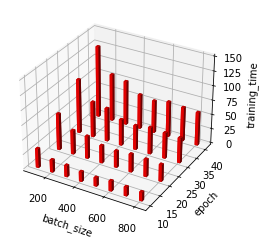

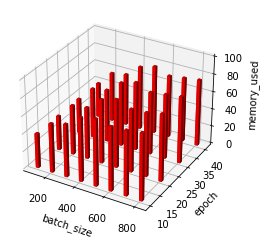

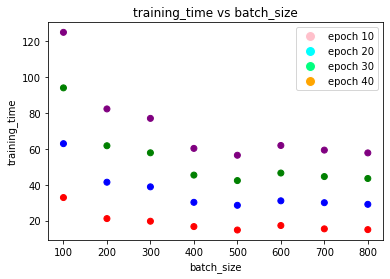

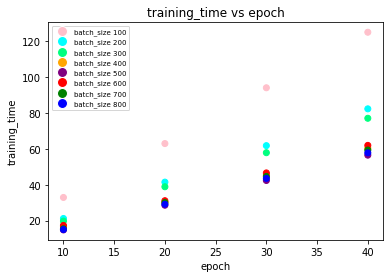

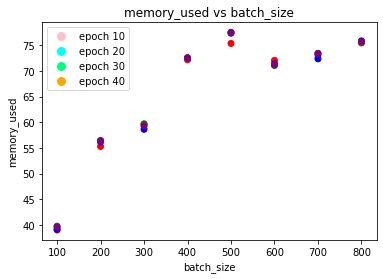

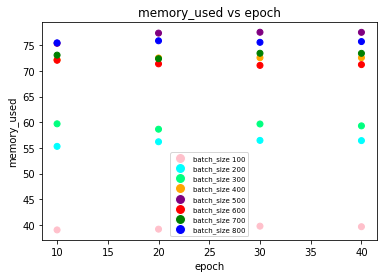

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def plot_as_2d(filename, x_label, y_label, depending_on):
    # load the csv file into a pandas dataframe
    df = pd.read_csv(filename)
    
    # create a color map based on the value of the epoch number
    if depending_on == 'batch_size':
        colors = df[depending_on].map({100: 'pink', 200: 'aqua', 300: 'springgreen', 400: 'orange', 500: 'purple', 600: 'red', 700: 'green', 800: 'blue'})
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 100', markerfacecolor='pink', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 200', markerfacecolor='aqua', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 300', markerfacecolor='springgreen', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 400', markerfacecolor='orange', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 500', markerfacecolor='purple', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 600', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 700', markerfacecolor='green', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 800', markerfacecolor='blue', markersize=10),
        ]
        # plot the graph
        plt.scatter(df[x_label], df[y_label], c=colors)

        # add labels and title to the graph
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs {x_label}')
        plt.legend(handles=legend_elements, fontsize=7)

        # show the plot
        plt.show()
        
    elif depending_on == 'epoch':
        colors = df[depending_on].map({10: 'red', 20: 'blue', 30: 'green', 40: 'purple'})
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 10', markerfacecolor='pink', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 20', markerfacecolor='aqua', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 30', markerfacecolor='springgreen', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 40', markerfacecolor='orange', markersize=10),
        ]
        # plot the graph
        plt.scatter(df[x_label], df[y_label], c=colors)

        # add labels and title to the graph
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs {x_label}')
        plt.legend(handles=legend_elements)

        # show the plot
        plt.show()

    
def plot_as_3d(filename, x_label, y_label, z_label):
    df = pd.read_csv(filename)

    # Split the DataFrame into features (X) and target (y)
    X = df[[x_label, y_label]]
    y = df[z_label]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    ax.bar3d(df[x_label], df[y_label], 0, dx=20, dy=1, dz=df[z_label], color="r")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if z_label == "training_time":
        ax.set_zlim(0, 150)
    elif z_label == "memory_used":
        ax.set_zlim(0, 100)
    ax.set_zlabel(z_label)

    plt.show()


plot_as_3d("data.csv", "batch_size", "epoch", "training_time")
plot_as_3d("data.csv", "batch_size", "epoch", "memory_used")
plot_as_2d("data.csv", "batch_size", "training_time", "epoch")
plot_as_2d("data.csv", "epoch", "training_time", "batch_size")
plot_as_2d("data.csv", "batch_size", "memory_used", "epoch")
plot_as_2d("data.csv", "epoch", "memory_used", "batch_size")